## System Setup

List of all the python libraries that are required

* numpy 
* pandas
* matplotlib
* seaborn
* wordcloud
* emoji
* jovian

Run the following command to get all the listed python libraries

```pip install numpy pandas matplotlib seaborn wordcloud emoji jovian --upgrade```

Te check whether do you all the required libraries the next should run without any errors

In [48]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

## How to obtain Whatsapp Chat data

* Open whatsapp 
* Open a Group/Inbox
* Click on the 3 dotted options button
* Click on more
* Click on export chat
* Click on without media 
* Export via Email/other IM's/....
* Download to your system rename to chat-data.txt and put it in a folder

![](https://i.imgur.com/KldS1n5.png)


```
Without media: exports 40k messages 
With media: exports 10k messages along with pictures/videos 
As im are doing chat data analysis i went with `without media` option 
```

## Data Preprocessing

* Regex cheatsheet
    * https://www.rexegg.com/regex-quickstart.html
* Regex test - live
    * https://regexr.com/
* Datetime format
    * http://strftime.org/
    
Use a custom a regex and datatime format by reffering to the above links if you run into empty df or format errors. As the exports from whatsapp are not standardized.

In [49]:
def rawToDf(file):
    with open(file, 'r',encoding='utf8') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s', raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s', raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
   
    # converting date-time pattern which is of type String to type datetime, format is to be specified for the whole string where the placeholders are extracted by the method    
    try:
        df['date_time'] = df['date_time'].apply(lambda x: dateparser.parse(x))
    except:
        print("oo")
        try:
            df['date_time'] = pd.to_datetime(df['date_time'], format='%m/%d/%y, %H:%M - ') #10/20/19, 10:24 pm - 
        except:
            df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y, %H:%M - ') #20/10/2019, 10:24 pm -
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         

    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

### Import data

In [50]:
df = rawToDf('poorna.txt')

oo


In [51]:
df.tail()

,date_time,user,msg
4603,2020-01-10 12:39:00,Ganesh mama2,Dear Sujata best wishes on your birthday -Radh...
4604,2020-01-10 18:54:00,Santos banavasi,<Media omitted>
4605,2020-01-10 19:01:00,Manu Mama Chitrak,"Dear Sujata, Wishing you A Happy Birthday . ..."
4606,2020-01-10 23:31:00,Manu Mama Chitrak,👍👍. _*WELCOME TO THE 21ST CENTURY!*_ � *Our...
4607,2020-01-11 13:20:00,Ganesh mama2,<Media omitted>


In [52]:
df.shape # no. of msgs

(4608, 3)

In [53]:
me = "Poornachandra" #its not poorna in unique values you'll get the actual user name

### Data Cleaning

In [54]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
images.shape

(1738, 3)

In [55]:
df["user"].unique()

array(['grp_notif', 'Milind Chitrak', 'Santos banavasi', 'Pooja Atte',
       'Kushal Chitrak.', '+91 89754 39527', 'Baby Chikkamma',
       'Hariprasad', 'Raghu Mama', 'Neetha Shetty', 'Meena Chitrak',
       '+91 87672 22300', 'Gayatri Chikkamma', 'Poornachandra',
       'Saisudha Chitrak.', '+91 97385 72018', '+91 88847 49720',
       '+91 98709 84057', 'Shubham Shetty', 'Dr Sai Charan',
       'Akshata Setty', 'Ganesh mama2', 'Manu Mama Chitrak',
       'Swetha Chitrak', '+91 98100 02459', 'Bagyashree Gudigar',
       '+91 98200 68823', '+91 89286 24627', 'Shubham', 'Sujatha Mami'],
      dtype=object)

In [56]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(104, 3)

In [57]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [58]:
df.tail()

,date_time,user,msg
4601,2020-01-10 11:24:00,Dr Sai Charan,Happy birthday kaki🎉🎊
4602,2020-01-10 11:40:00,Shubham Shetty,Huttu habbada valumeya shubhashayagslu preetiy...
4603,2020-01-10 12:39:00,Ganesh mama2,Dear Sujata best wishes on your birthday -Radh...
4605,2020-01-10 19:01:00,Manu Mama Chitrak,"Dear Sujata, Wishing you A Happy Birthday . ..."
4606,2020-01-10 23:31:00,Manu Mama Chitrak,👍👍. _*WELCOME TO THE 21ST CENTURY!*_ � *Our...


In [59]:
df.reset_index(inplace=True, drop=True)
df.shape

(2766, 3)

# Lets Discuss on what do we want to get out of this data
    * Is raw data enough to get that insight?
    * if not what can be possible way to get that insight?
    * Whats the use of that insight?
    
**Questions from the audience**

## Q 1) Who is the most active member of the group. Who is the least active?

In [60]:
df.groupby("user")["msg"].count().sort_values(ascending=False)

user
Raghu Mama            286
Milind Chitrak        279
Santos banavasi       220
Poornachandra         197
Meena Chitrak         196
Kushal Chitrak.       188
Saisudha Chitrak.     176
+91 98709 84057       163
Pooja Atte            152
Gayatri Chikkamma     140
Ganesh mama2          139
Neetha Shetty         116
Hariprasad             97
+91 89754 39527        68
Dr Sai Charan          61
Manu Mama Chitrak      50
+91 88847 49720        46
Shubham Shetty         38
Akshata Setty          30
+91 97385 72018        28
+91 87672 22300        27
+91 98200 68823        21
Baby Chikkamma         18
Shubham                11
Swetha Chitrak         11
+91 98100 02459         5
Bagyashree Gudigar      1
Sujatha Mami            1
+91 89286 24627         1
Name: msg, dtype: int64

## Q 2) Count of all the emojis that i have used?

In [61]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == me:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [62]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

😂 - 11
😋 - 11
🤣 - 8
🇮🇳 - 4
😱 - 4
🥶 - 3
🧐 - 3
🐓 - 3
🙂 - 3
🏻 - 2


## Q 3) What can my activity say about my sleep cycle?

In [63]:
def to_hour(val):
    return val.hour

In [64]:
df.head()

,date_time,user,msg
0,2019-06-14 10:44:00,Milind Chitrak,
1,2019-06-14 11:35:00,Pooja Atte,😛😛😂😂
2,2019-06-14 11:35:00,Kushal Chitrak.,🤣🤣🤣
3,2019-06-14 19:15:00,Baby Chikkamma,Nanuyawaghosacarallikulitukolluvadugodblessyou...
4,2019-06-14 20:09:00,Hariprasad,Thanks Chikkamma 🙏


In [65]:
df['hour'] = df['date_time'].apply(to_hour)

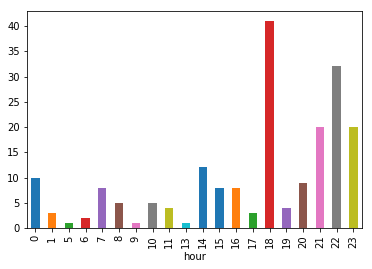

In [66]:
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

## Q 4) 
## What is the difference in Weekend vs Weekday usage pattern?
## How many words do I type on average on weekday vs weekend?

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html

In [67]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 

In [68]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [69]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

Raghu Mama            286
Milind Chitrak        279
Santos banavasi       220
Poornachandra         197
Meena Chitrak         196
Kushal Chitrak.       188
Saisudha Chitrak.     176
+91 98709 84057       163
Pooja Atte            152
Gayatri Chikkamma     140
Ganesh mama2          139
Neetha Shetty         116
Hariprasad             97
+91 89754 39527        68
Dr Sai Charan          61
Manu Mama Chitrak      50
+91 88847 49720        46
Shubham Shetty         38
Akshata Setty          30
+91 97385 72018        28
+91 87672 22300        27
+91 98200 68823        21
Baby Chikkamma         18
Swetha Chitrak         11
Shubham                11
+91 98100 02459         5
Bagyashree Gudigar      1
+91 89286 24627         1
Sujatha Mami            1
Name: user, dtype: int64

In [70]:
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['Raghu Mama',
 'Milind Chitrak',
 'Santos banavasi',
 'Poornachandra',
 'Meena Chitrak']

In [71]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,msg,hour,weekday,is_weekend
0,2019-06-14 10:44:00,Milind Chitrak,,10,Friday,False
5,2019-06-14 20:55:00,Santos banavasi,Mavshi idyava bhashe,20,Friday,False
6,2019-06-14 20:55:00,Santos banavasi,Mavshiiiii,20,Friday,False
7,2019-06-14 22:18:00,Raghu Mama,Atya nim mobile alli space bar delete agideya ...,22,Friday,False
9,2019-06-14 23:04:00,Meena Chitrak,No problem Baby.I already read ur msg.its ok.,23,Friday,False


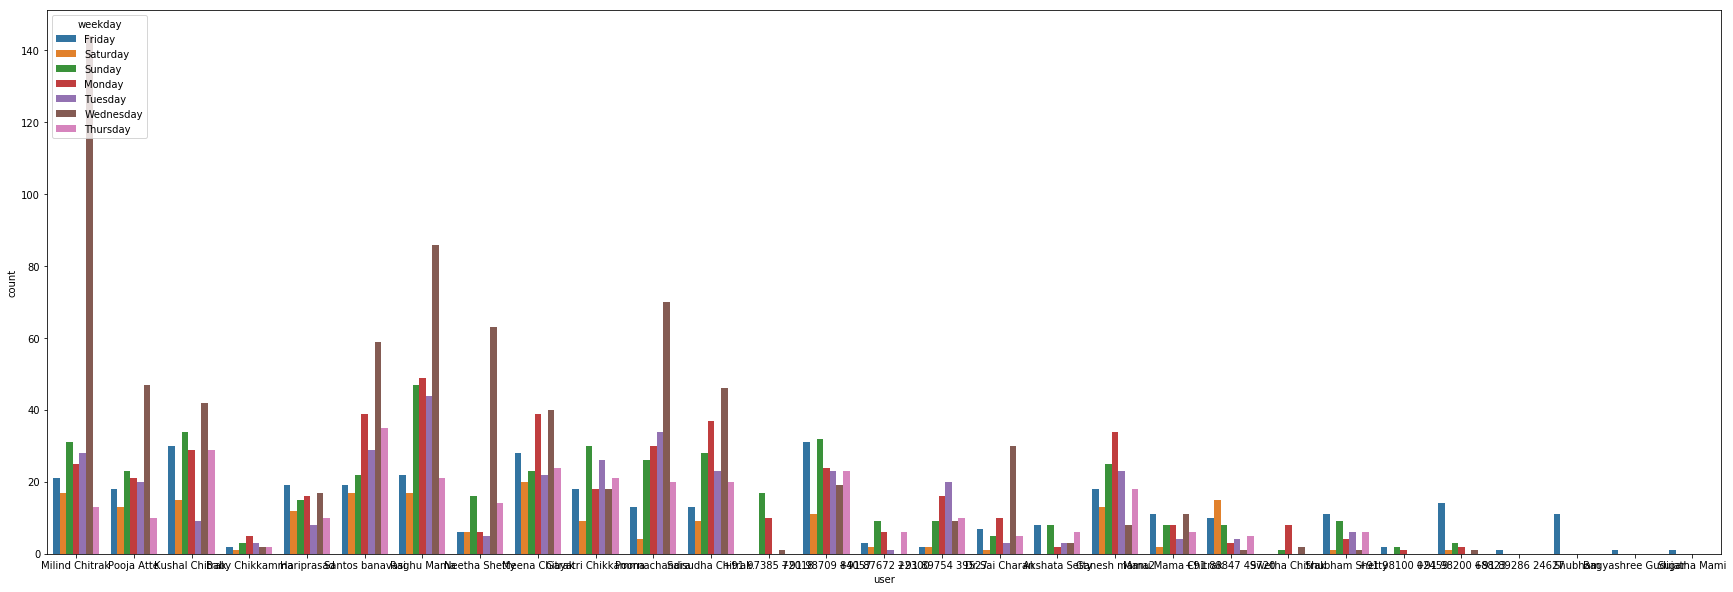

In [72]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="weekday", data=df)

In [73]:
df_top5['is_weekend'] = df_top5.weekday.isin(['Sunday', 'Saturday'])

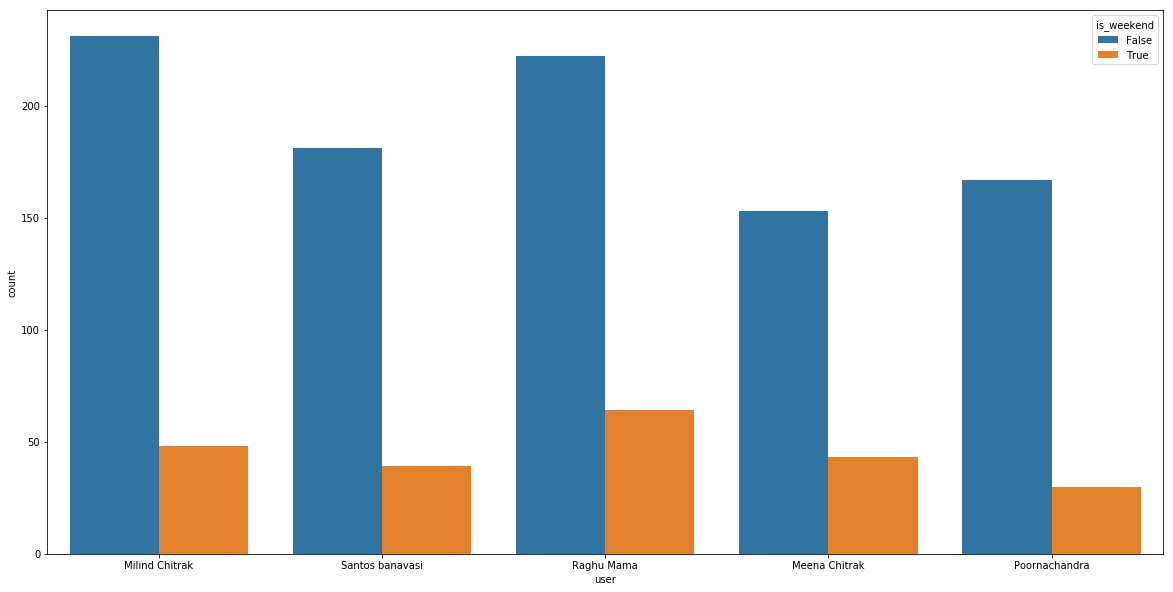

In [74]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top5)

In [28]:
def word_count(val):
    return len(val.split())

In [29]:
df['no_of_words'] = df['msg'].apply(word_count)

In [30]:
df_top5['no_of_words'] = df_top5['msg'].apply(word_count)

In [31]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

20676

In [32]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

5926

In [33]:
total_words_weekday/5 # average words on a weekday

4135.2

In [34]:
total_words_weekend/2 # average words on a weekend

2963.0

In [35]:
df.groupby('user')['no_of_words'].sum().sort_values(ascending=False)

user
Gayatri Chikkamma     5203
Raghu Mama            2715
Ganesh mama2          2546
Meena Chitrak         2232
Santos banavasi       2217
Milind Chitrak        1890
+91 98709 84057       1615
Manu Mama Chitrak     1199
Neetha Shetty         1104
Poornachandra         1026
Kushal Chitrak.        966
Saisudha Chitrak.      831
Pooja Atte             651
Hariprasad             507
+91 89754 39527        453
Shubham Shetty         258
Dr Sai Charan          217
+91 87672 22300        215
Akshata Setty          166
+91 88847 49720        155
+91 97385 72018         95
Baby Chikkamma          93
Swetha Chitrak          78
+91 98200 68823         56
+91 98100 02459         56
Shubham                 34
Bagyashree Gudigar      16
Sujatha Mami             4
+91 89286 24627          4
Name: no_of_words, dtype: int64

In [36]:
(df_top5.groupby('user')['no_of_words'].sum()/df_top5.groupby('user').size()).sort_values(ascending=False)

user
Meena Chitrak      11.387755
Santos banavasi    10.077273
Raghu Mama          9.493007
Milind Chitrak      6.774194
Poornachandra       5.208122
dtype: float64

In [37]:
wordPerMsg_weekday_vs_weekend = (df_top5.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df_top5.groupby(['user', 'is_weekend']).size())
wordPerMsg_weekday_vs_weekend

user             is_weekend
Meena Chitrak    False         13.254902
                 True           4.744186
Milind Chitrak   False          6.878788
                 True           6.270833
Poornachandra    False          5.502994
                 True           3.566667
Raghu Mama       False         10.252252
                 True           6.859375
Santos banavasi  False         10.602210
                 True           7.641026
dtype: float64

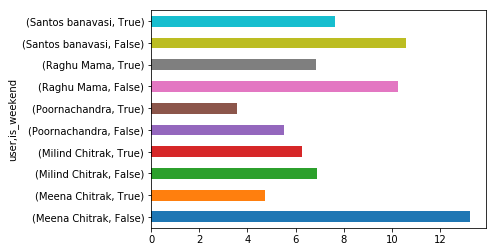

In [38]:
wordPerMsg_weekday_vs_weekend.plot(kind='barh')

## Q 5)
## Most Usage - Time of Day

In [39]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,3.0,20.0,1.0,36.0,15.0,8.0,8.0
1,1.0,NaN,6.0,2.0,3.0,NaN,3.0
2,1.0,NaN,3.0,1.0,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,3.0,NaN,NaN


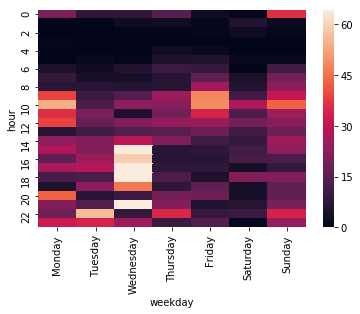

In [40]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

## Q 6)
## In any group, do I have any inclination towards responding to someone? 

In [41]:
my_msgs_index = np.array(df[df['user']==me].index)

In [42]:
prev_msgs_index = my_msgs_index - 1

In [43]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(197, 7)

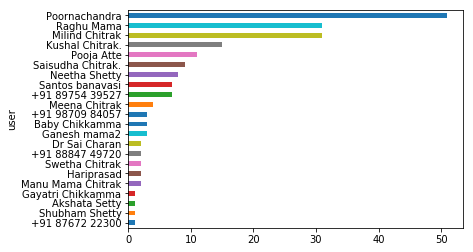

In [44]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')

## Q 7)
## Which are the most common words?

In [45]:
comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 


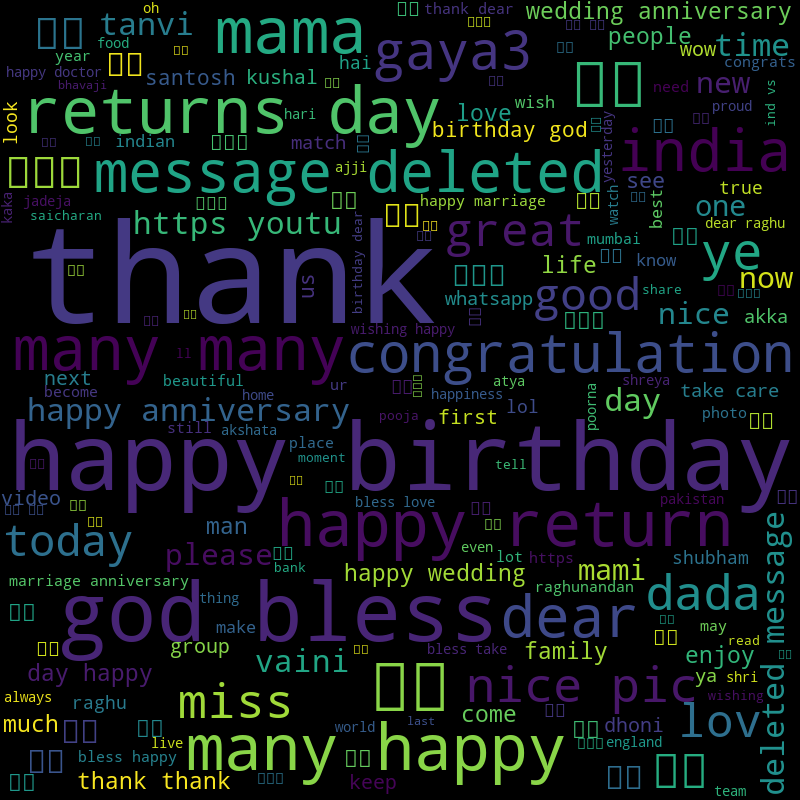

In [46]:
wordcloud.to_image()

## Know What They Know(atleast by little
* Let this meetup series encourage people to work on their own data:
    * Ask many questions on whatsapp chat data, commit to jovian with your answers/analysis visulization. Experiment!!!
* Explore more data resources here's a list i could find, share if you find any @ dsnet.org
    * WhatsApp
    * Google take out (https://takeout.google.com/)
        * Keyboard
        * Maps
        * Calendar 
        * Chrome
        * Pay
        * etc....
    * https://www.cnet.com/how-to/how-to-download-all-your-instagram-data/
    * https://in.pcmag.com/software/120204/how-to-download-your-facebook-data-and-6-surprising-things-i-found
* Lets move step by step EDA first to try answer the questions on our own then move to some ML/DL Models 



In [47]:
jovian.commit()

[jovian] Saving notebook..


<IPython.core.display.Javascript object>

[jovian] Updating notebook "241f64e125cf4fbb9009cb2dc2d8aaa5" on https://jvn.io/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jvn.io/poornachandrakashi/241f64e125cf4fbb9009cb2dc2d8aaa5
